# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from urllib.error import HTTPError
import openweathermapy as ow
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "..\Resources\worldcities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | hasaki
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | marsa matruh
Processing Record 5 of Set 1 | guerrero negro
City not found. Skipping...
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | brae
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | araceli
Processing Record 10 of Set 1 | ewa beach
Processing Record 11 of Set 1 | hovd
City not found. Skipping...
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | kotelnich
Processing Record 16 of Set 1 | korem
City not found. Skipping...
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | gramalote
Processing Record 20 of Set 1 | zhezkazgan
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | g

Processing Record 40 of Set 4 | yulara
Processing Record 41 of Set 4 | mount pleasant
Processing Record 42 of Set 4 | parrita
Processing Record 43 of Set 4 | aklavik
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | grand river south east
Processing Record 46 of Set 4 | lasa
Processing Record 47 of Set 4 | tiznit
Processing Record 48 of Set 4 | beloha
Processing Record 49 of Set 4 | locri
Processing Record 1 of Set 5 | martil
Processing Record 2 of Set 5 | joshimath
Processing Record 3 of Set 5 | ayan
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 5 | manokwari
Processing Record 5 of Set 5 | cabedelo
Processing Record 6 of Set 5 | fare
Processing Record 7 of Set 5 | muros
Processing Record 8 of Set 5 | kirakira
Processing Record 9 of Set 5 | tigzirt
Processing Record 10 of Set 5 | teya
Processing Record 11 of Set 5 | hami
Processing Record 12 of Set 5 | terra nova
Processing Record 13 of Set 5 | kahului
Processing Record 14 of Se

Processing Record 26 of Set 8 | aitape
Processing Record 27 of Set 8 | hambantota
City not found. Skipping...
Processing Record 28 of Set 8 | provideniya
Processing Record 29 of Set 8 | vicksburg
City not found. Skipping...
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | kurumkan
City not found. Skipping...
Processing Record 32 of Set 8 | san quintin
City not found. Skipping...
Processing Record 33 of Set 8 | bulungu
Processing Record 34 of Set 8 | saquarema
Processing Record 35 of Set 8 | chern
Processing Record 36 of Set 8 | kushima
Processing Record 37 of Set 8 | eregli
Processing Record 38 of Set 8 | gravdal
Processing Record 39 of Set 8 | manali
Processing Record 40 of Set 8 | loa janan
Processing Record 41 of Set 8 | amahai
Processing Record 42 of Set 8 | alekseyevsk
Processing Record 43 of Set 8 | waddan
Processing Record 44 of Set 8 | torres
Processing Record 45 of Set 8 | chicama
Processing Record 46 of Set 8 | manakara
Processing Record 47 of Set 8 | sa

Processing Record 11 of Set 12 | verkhnevilyuysk
Processing Record 12 of Set 12 | manzanillo
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 12 | dabola
Processing Record 14 of Set 12 | chumikan
Processing Record 15 of Set 12 | san pascual
Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | tilichiki
Processing Record 18 of Set 12 | boulder
City not found. Skipping...
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,0,AU,1576035036,15,-33.64,115.35,89.01,9.04
1,hasaki,75,JP,1576035036,82,35.73,140.83,63.00,5.82
2,bluff,0,AU,1576035037,22,-23.58,149.07,96.75,8.84
3,marsa matruh,100,FR,1576035037,100,42.82,2.16,41.00,2.24
4,guerrero negro,17,AR,1576035037,77,-24.19,-65.45,69.80,3.36


In [7]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [8]:
weather_dataframe.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/fig1.png'

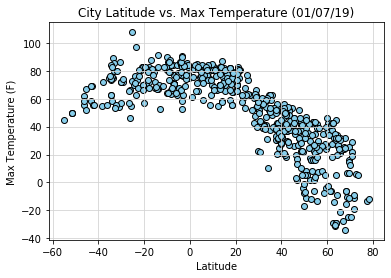

In [23]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/fig2.png'

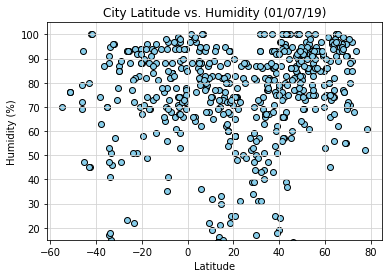

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/fig3.png'

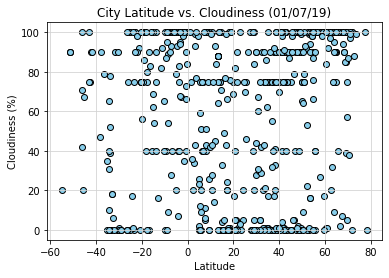

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/fig4.png'

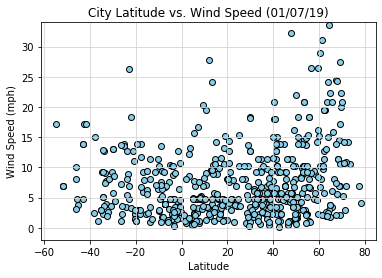

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()